Index(['timestamp', 'pv_mod1', 'pv_mod2', 'pv_mod3', 'Demand', 'pv', 'Price',
       'Temperature', 'Pressure (hPa)', 'Cloud_cover (%)',
       'Cloud_cover_low (%)', 'Cloud_cover_mid (%)', 'Cloud_cover_high (%)',
       'Wind_speed_10m (km/h)', 'Shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'daymax'],
      dtype='object')


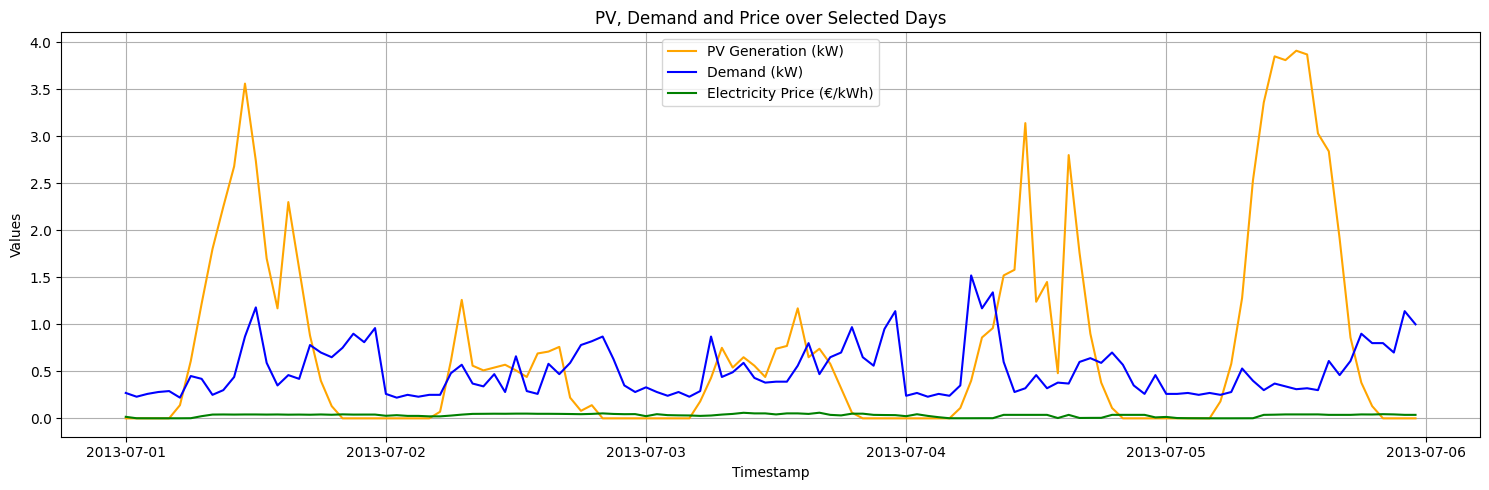

In [1]:
#Task 1

import pandas as pd
import matplotlib.pyplot as plt

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp']) 

#columns from the document
print(df.columns) 
df.head()

#filtration of first 5 days
df['date'] = df['timestamp'].dt.date
selected_days = df['date'].unique()[:5]
df_subset = df[df['date'].isin(selected_days)]

#visualisation
plt.figure(figsize=(15, 5))
plt.plot(df_subset['timestamp'], df_subset['pv'], label='PV Generation (kW)', color='orange')
plt.plot(df_subset['timestamp'], df_subset['Demand'], label='Demand (kW)', color='blue')
plt.plot(df_subset['timestamp'], df_subset['Price'], label='Electricity Price (€/kWh)', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('PV, Demand and Price over Selected Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Demand summary:
count    8759.000000
mean        0.530993
std         0.375317
min         0.000000
25%         0.280000
50%         0.380000
75%         0.660000
max         4.240000
Name: Demand, dtype: float64

Price summary:
count    8759.000000
mean        0.046078
std         0.025252
min         0.000000
25%         0.027870
50%         0.045430
75%         0.060245
max         0.255000
Name: Price, dtype: float64

PV summary:
count    8759.000000
mean        0.659565
std         1.106453
min         0.000000
25%         0.000000
50%         0.000000
75%         0.820000
max         4.810000
Name: pv, dtype: float64


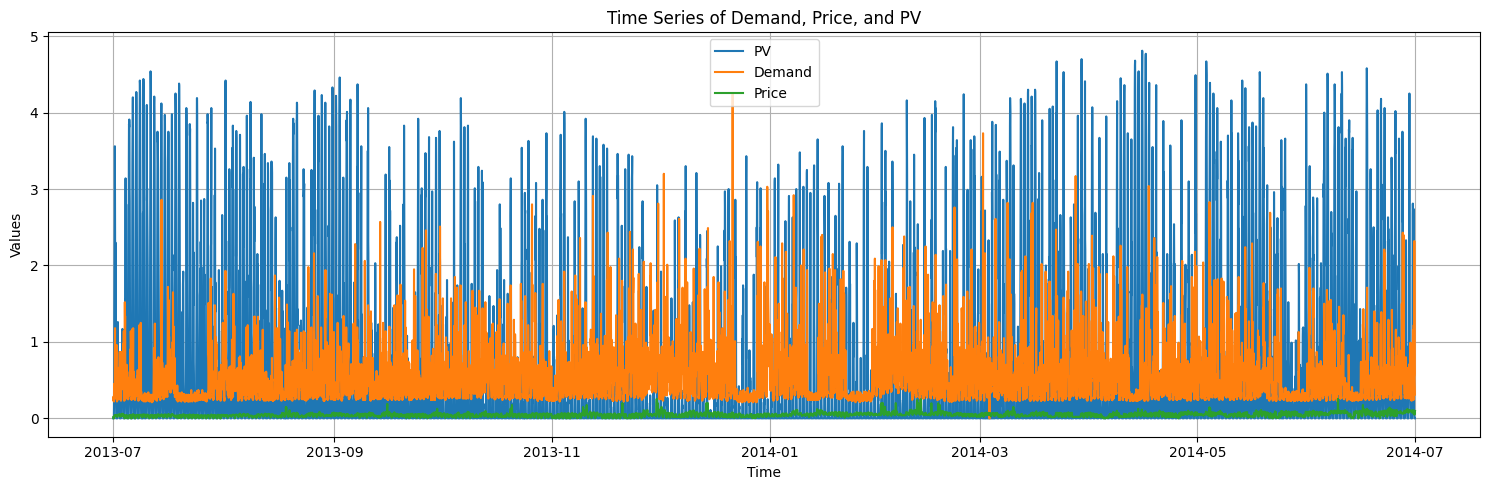

In [2]:
#Task 3, part 1

import pandas as pd
import matplotlib.pyplot as plt

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp']) 

#staticstical summaries
print("Demand summary:")
print(df['Demand'].describe())

print("\nPrice summary:")
print(df['Price'].describe())

print("\nPV summary:")
print(df['pv'].describe())

#timeseries plot
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['pv'], label='PV')
plt.plot(df['timestamp'], df['Demand'], label='Demand')
plt.plot(df['timestamp'], df['Price'], label='Price')
plt.legend()
plt.title('Time Series of Demand, Price, and PV')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()

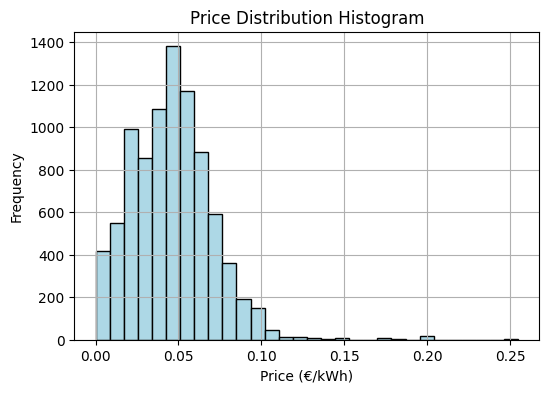

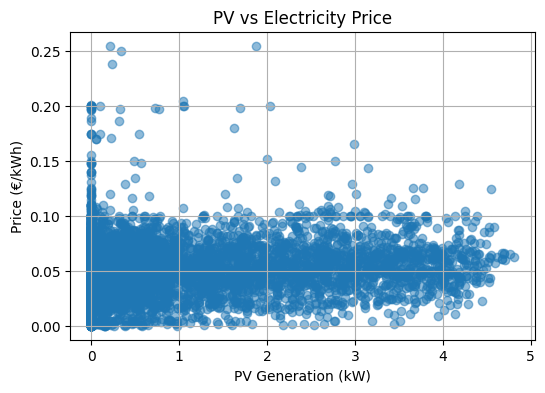

In [3]:
#Task 3, part 2, data visualisation using two different suitable plots

import pandas as pd
import matplotlib.pyplot as plt

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp']) 

#histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Price'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Price Distribution Histogram')
plt.xlabel('Price (€/kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df['pv'], df['Price'], alpha=0.5)
plt.title('PV vs Electricity Price')
plt.xlabel('PV Generation (kW)')
plt.ylabel('Price (€/kWh)')
plt.grid(True)
plt.show()

Missing values in pv_mod1: 438
Missing values in pv_mod2: 491
Missing values in pv_mod3: 510
pv_mod1    4411
pv_mod2    4634
pv_mod3    4584
dtype: int64
pv_mod1    0
pv_mod2    0
pv_mod3    0
dtype: int64
Original rows: 8759
After deletion: 8321
Missing values in pv_mod1_mean: 0
Missing values in pv_mod1_avg: 46
                    Original  Mean Imputed  Multivariate Imputed
Mean                0.660460      0.660460              0.650573
Standard Deviation  1.108147      1.080082              1.097506
Minimum             0.000000      0.000000              0.000000
Maximum             4.810000      4.810000              4.810000


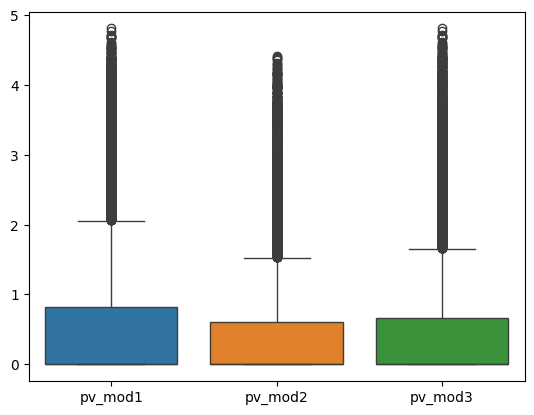

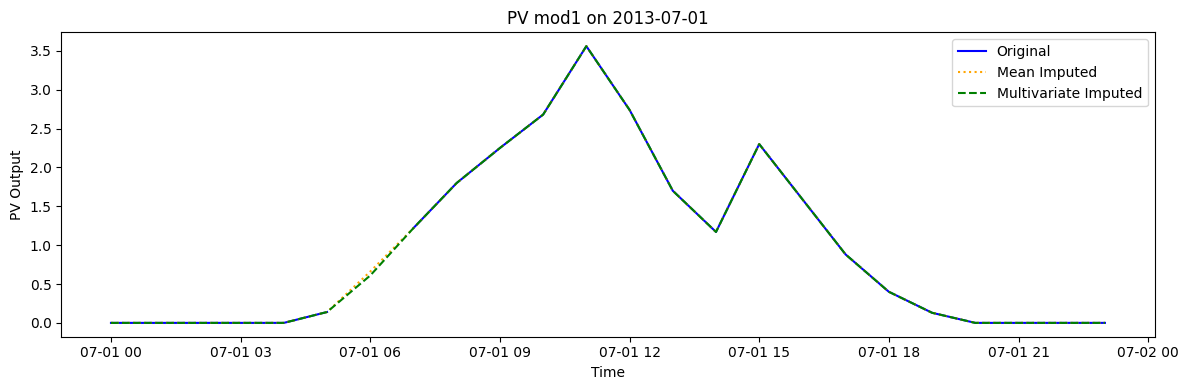

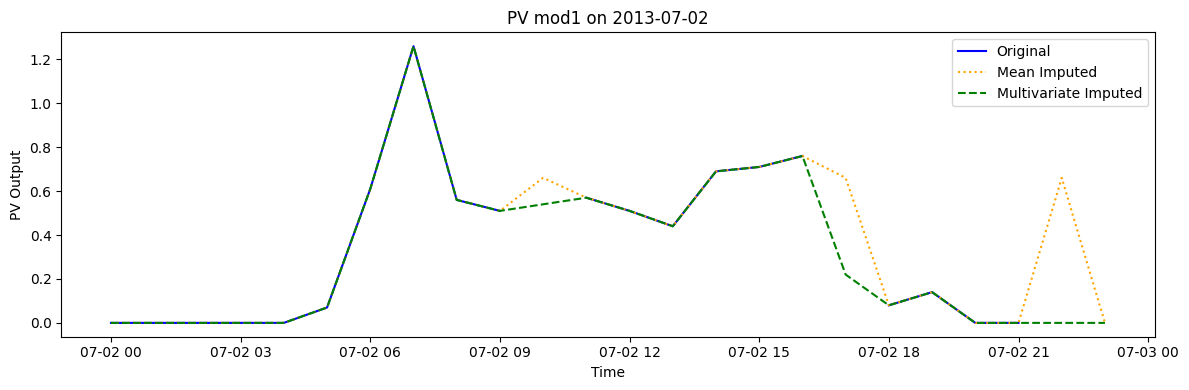

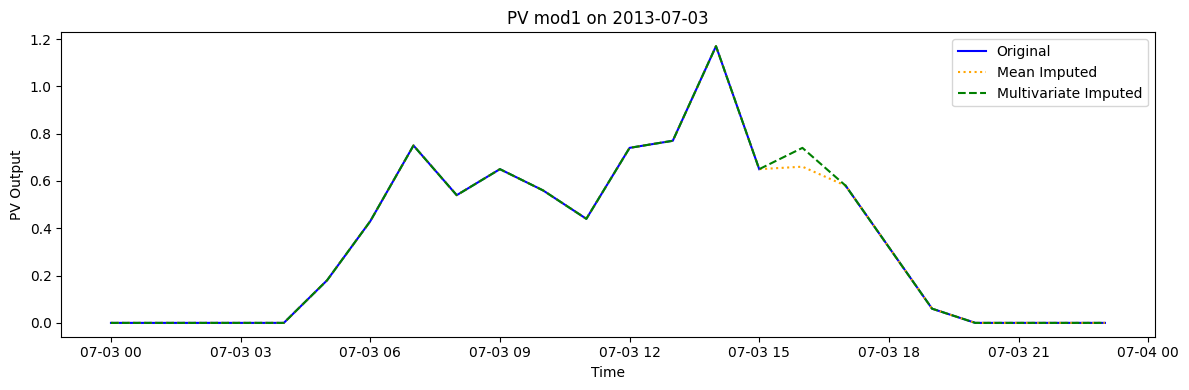

In [4]:
#Task 4

import pandas as pd

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp']) 

#missing values for each PV module
print("Missing values in pv_mod1:", df['pv_mod1'].isnull().sum())
print("Missing values in pv_mod2:", df['pv_mod2'].isnull().sum())
print("Missing values in pv_mod3:", df['pv_mod3'].isnull().sum())
print((df[['pv_mod1', 'pv_mod2', 'pv_mod3']] == 0).sum())
print((df[['pv_mod1', 'pv_mod2', 'pv_mod3']] < 0).sum())

#outliers
import seaborn as sns
sns.boxplot(data=df[['pv_mod1', 'pv_mod2', 'pv_mod3']])

#deletion method
df_deletion = df.dropna(subset=['pv_mod1'])
print("Original rows:", len(df))
print("After deletion:", len(df_deletion))

#univariate imputation 
df['pv_mod1_mean'] = df['pv_mod1'].fillna(df['pv_mod1'].mean())
print("Missing values in pv_mod1_mean:", df['pv_mod1_mean'].isnull().sum())

#multivariate imputation (Average of PV mod2 and PV mod3)
df['pv_mod1_avg'] = df['pv_mod1']
mask = df['pv_mod1'].isnull()
df.loc[mask, 'pv_mod1_avg'] = (df.loc[mask, 'pv_mod2'] + df.loc[mask, 'pv_mod3']) / 2
print("Missing values in pv_mod1_avg:", df['pv_mod1_avg'].isnull().sum())

#Task 4, part 2

summary = pd.DataFrame({
    'Original': [
        df['pv_mod1'].mean(),
        df['pv_mod1'].std(),
        df['pv_mod1'].min(),
        df['pv_mod1'].max()
    ],
    'Mean Imputed': [
        df['pv_mod1_mean'].mean(),
        df['pv_mod1_mean'].std(),
        df['pv_mod1_mean'].min(),
        df['pv_mod1_mean'].max()
    ],
    'Multivariate Imputed': [
        df['pv_mod1_avg'].mean(),
        df['pv_mod1_avg'].std(),
        df['pv_mod1_avg'].min(),
        df['pv_mod1_avg'].max()
    ]
}, index=['Mean', 'Standard Deviation', 'Minimum', 'Maximum'])

print(summary)

#Task 4, part 3
#first three days
sample_days = df['timestamp'].dt.date.unique()[:3]  

for day in sample_days:
    daily_data = df[df['timestamp'].dt.date == day]

    plt.figure(figsize=(12, 4))
   
    plt.plot(daily_data['timestamp'], daily_data['pv_mod1'], label='Original', color='blue')
    plt.plot(daily_data['timestamp'], daily_data['pv_mod1_mean'], label='Mean Imputed', color='orange', linestyle=':')
    plt.plot(daily_data['timestamp'], daily_data['pv_mod1_avg'], label='Multivariate Imputed', color='green', linestyle='--')
    plt.title(f'PV mod1 on {day}')
    plt.xlabel('Time')
    plt.ylabel('PV Output')
    plt.legend()
    plt.tight_layout()
    plt.show()

            Demand  Temperature  Wind_speed_10m (km/h)  \
count  8759.000000  8759.000000            8759.000000   
mean      0.530993     7.515413              15.991072   
std       0.375317     8.312251               7.451494   
min       0.000000   -18.300000               0.400000   
25%       0.280000     2.000000              10.400000   
50%       0.380000     6.800000              15.000000   
75%       0.660000    14.000000              21.100000   
max       4.240000    28.900000              51.100000   

       Shortwave_radiation (W/m²)  Cloud_cover (%)  Pressure (hPa)  
count                 1664.000000      8759.000000     8759.000000  
mean                   114.954928        68.704761     1012.776367  
std                    181.901501        36.274348       10.199486  
min                      0.000000         0.000000      971.700000  
25%                      0.000000        39.000000     1006.300000  
50%                      2.000000        88.000000     1013.300

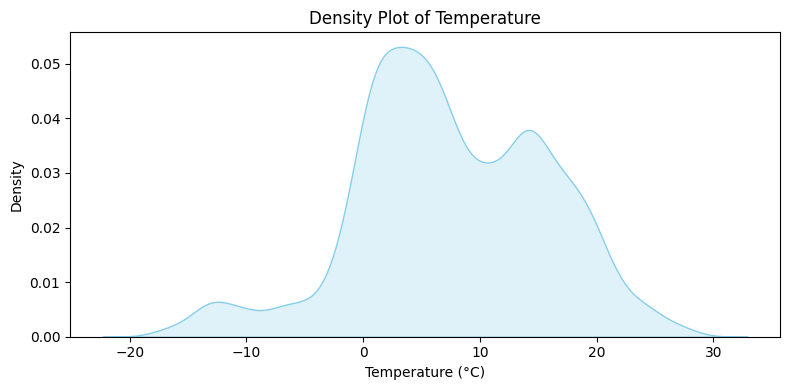

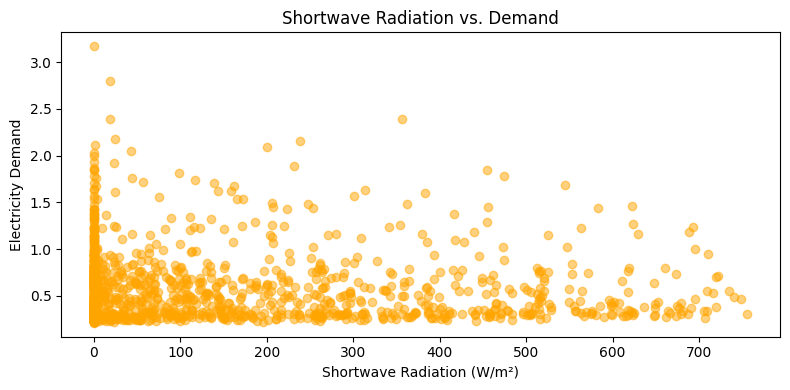

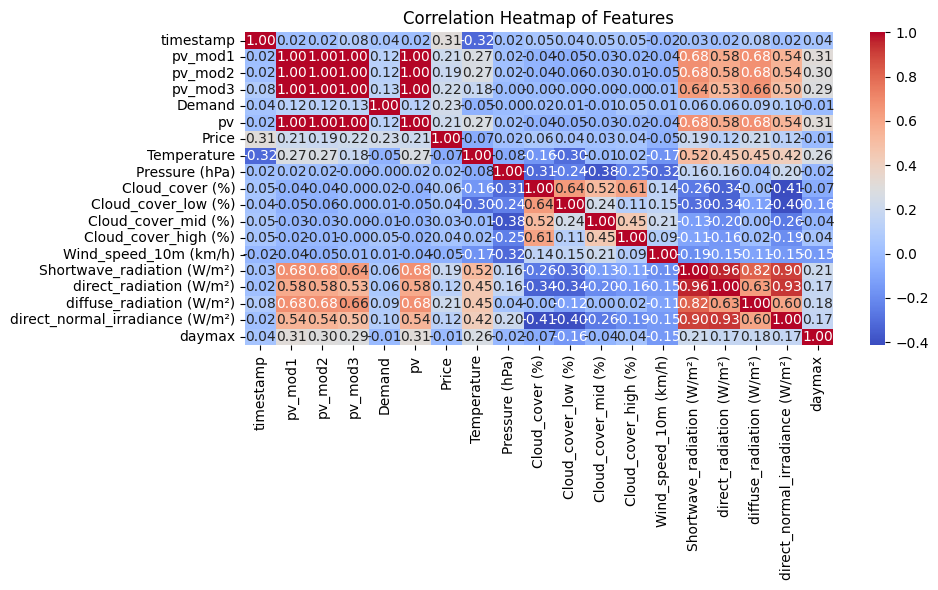

Demand                             1.000000
log_Demand                         0.985903
hour                               0.283660
Price                              0.227946
pv_mod3                            0.134576
pv_mod1                            0.120869
pv_mod2                            0.119522
pv                                 0.118369
direct_normal_irradiance (W/m²)    0.096644
sqrt_radiation                     0.095479
diffuse_radiation (W/m²)           0.093513
Shortwave_radiation (W/m²)         0.062958
direct_radiation (W/m²)            0.062731
Cloud_cover_high (%)               0.053211
timestamp                          0.043900
Cloud_cover (%)                    0.021217
Cloud_cover_low (%)                0.014626
Wind_speed_10m (km/h)              0.014298
Pressure (hPa)                    -0.003479
daymax                            -0.008166
Cloud_cover_mid (%)               -0.010545
feels_like_temp                   -0.044644
Temperature                     

In [5]:
# Task 5

import pandas as pd
import matplotlib.pyplot as plt

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp']) 

print(df[['Demand', 'Temperature', 'Wind_speed_10m (km/h)', 'Shortwave_radiation (W/m²)', 'Cloud_cover (%)', 'Pressure (hPa)']].describe())

import seaborn as sns

plt.figure(figsize=(8, 4))
sns.kdeplot(df['Temperature'], fill=True, color='skyblue')
plt.title('Density Plot of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df['Shortwave_radiation (W/m²)'], df['Demand'], alpha=0.5, color='orange')
plt.title('Shortwave Radiation vs. Demand')
plt.xlabel('Shortwave Radiation (W/m²)')
plt.ylabel('Electricity Demand')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

#Task 5, part 2, transformations
import numpy as np
df['log_Demand'] = np.log1p(df['Demand'])
df['sqrt_radiation'] = np.sqrt(df['Shortwave_radiation (W/m²)'])

#Task 5, part 3
df['hour'] = df['timestamp'].dt.hour
df['feels_like_temp'] = df['Temperature'] - 0.7 * df['Wind_speed_10m (km/h)']

#Task 5, part 4
correlations = df.corr()['Demand'].sort_values(ascending=False)
print(correlations)

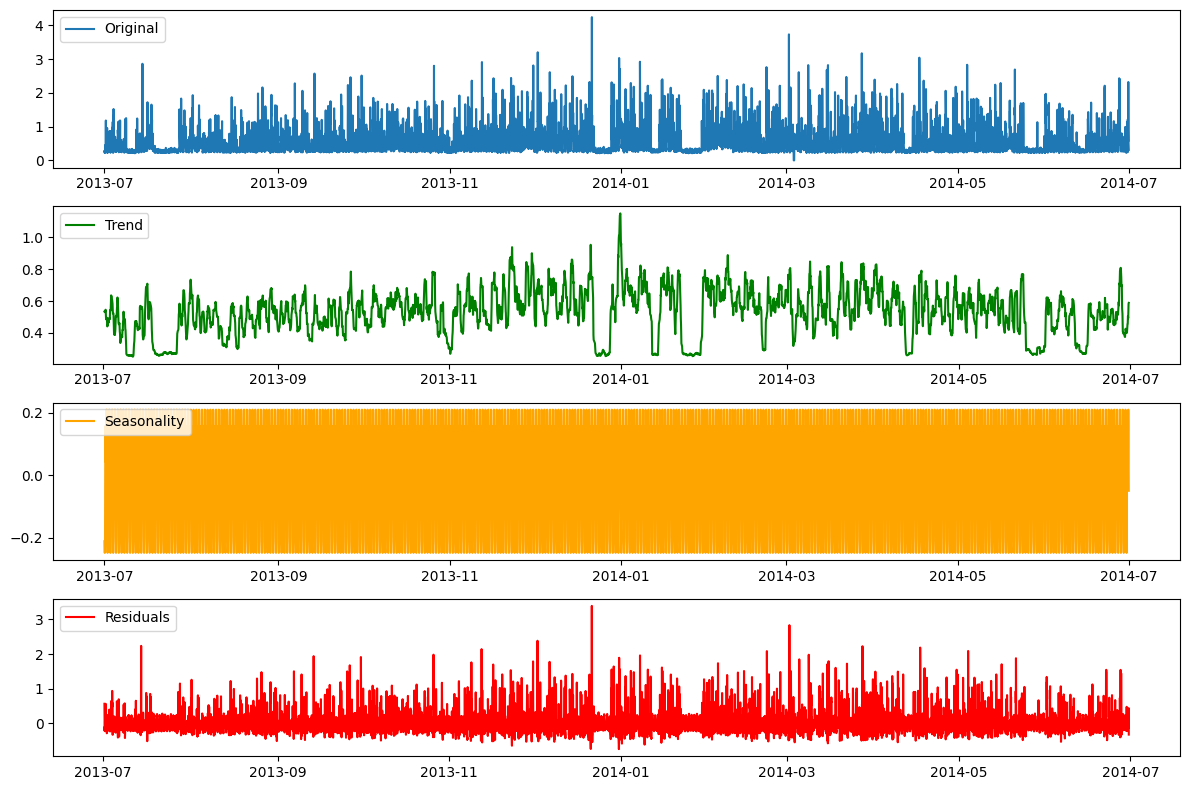

<Figure size 1000x500 with 0 Axes>

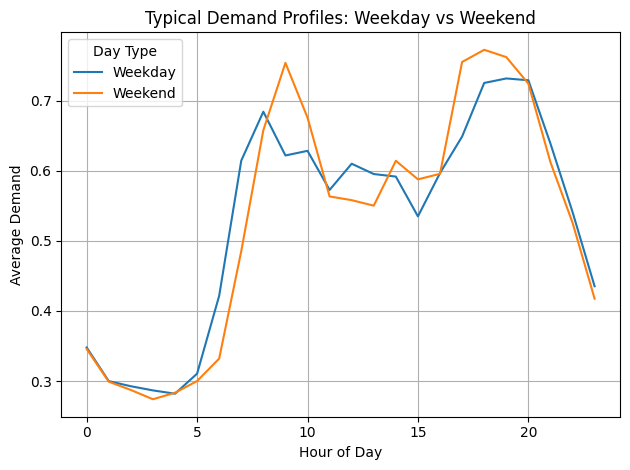

In [9]:
#Task 6, part 1

import pandas as pd

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp']) 

from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index('timestamp', inplace=True)
decomposition = seasonal_decompose(df['Demand'], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Demand'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#Task 6, part 3

df['hour'] = df.index.hour
df['day_type'] = df.index.dayofweek.map(lambda x: 'Weekday' if x < 5 else 'Weekend')

profile = df.groupby(['day_type', 'hour'])['Demand'].mean().unstack()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
profile.T.plot()
plt.title('Typical Demand Profiles: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Demand')
plt.legend(title='Day Type')
plt.grid(True)
plt.tight_layout()
plt.show()

ADF Statistic: -11.780856622404709
p-value: 1.0357313080269851e-21
NRMSE Model 1: 0.0803
NRMSE Model 2: 0.0743
Walk-forward NRMSE Model 1 (ARIMA(2,1,0)): 0.3276
Walk-forward NRMSE Model 2 (ARIMA(1,1,1)): 0.2914


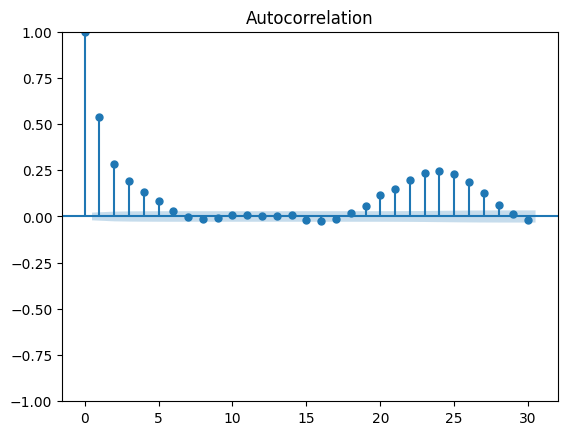

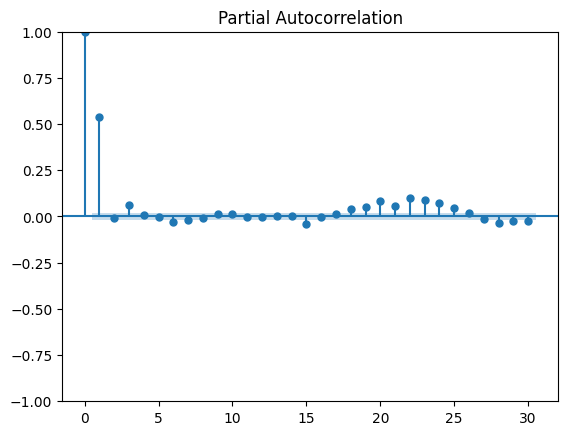

In [8]:
#Task 7, part 1

import pandas as pd

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp']) 

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Demand'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

#Task 7, part 2

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df['Demand'].dropna(), lags=30)
plot_pacf(df['Demand'].dropna(), lags=30)

#Task 7, part 3

from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(df['Demand'], order=(2,1,0)).fit()
model2 = ARIMA(df['Demand'], order=(1,1,1)).fit()

#Task 7, part 4
#a
from sklearn.metrics import mean_squared_error
import numpy as np

def nrmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / (y_true.max() - y_true.min())

pred1 = model1.predict(start=1, end=len(df)-1)
pred2 = model2.predict(start=1, end=len(df)-1)

nrmse1 = nrmse(df['Demand'].iloc[1:], pred1)
nrmse2 = nrmse(df['Demand'].iloc[1:], pred2)

print(f'NRMSE Model 1: {nrmse1:.4f}')
print(f'NRMSE Model 2: {nrmse2:.4f}')

#b
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#load and prepare data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.asfreq('h')  # Set hourly frequency to avoid warnings

#define NRMSE function with safe division
def nrmse(y_true, y_pred):
    range_val = y_true.max() - y_true.min()
    if range_val == 0:
        return np.nan  # Avoid divide-by-zero
    return np.sqrt(mean_squared_error(y_true, y_pred)) / range_val

#get last 7 days of data
end_date = df.index.max()
start_date = end_date - pd.Timedelta(days=7)
last_week = df.loc[start_date:end_date]

#initialize error lists
errors_model1 = []
errors_model2 = []

#walk-forward loop: daily folds
for day in pd.date_range(start=start_date, end=end_date, freq='D'):
    train = df[df.index < day]
    test = df[(df.index >= day) & (df.index < day + pd.Timedelta(days=1))]

    if len(test) == 0 or len(train) < 10:
        continue  # skip if not enough data

    #train models
    model1 = ARIMA(train['Demand'], order=(2,1,0)).fit()
    model2 = ARIMA(train['Demand'], order=(1,1,1)).fit()

    #predict using integer positions
    start_idx = len(train)
    end_idx = start_idx + len(test) - 1

    pred1 = model1.predict(start=start_idx, end=end_idx)
    pred2 = model2.predict(start=start_idx, end=end_idx)

    #assign test index to predictions
    pred1.index = test.index
    pred2.index = test.index

    #evaluate
    errors_model1.append(nrmse(test['Demand'], pred1))
    errors_model2.append(nrmse(test['Demand'], pred2))

print(f'Walk-forward NRMSE Model 1 (ARIMA(2,1,0)): {np.nanmean(errors_model1):.4f}')
print(f'Walk-forward NRMSE Model 2 (ARIMA(1,1,1)): {np.nanmean(errors_model2):.4f}')

In [1]:
#Task 8
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#data
df = pd.read_csv('train_253237.csv', parse_dates=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

#create lag features
df['lag_1'] = df['Demand'].shift(1)
df['lag_2'] = df['Demand'].shift(2)
df['lag_3'] = df['Demand'].shift(3)

#drop missing values from lagging
df.dropna(inplace=True)

#split into train and test (last 7 days for test)
end_date = df.index.max()
start_test = end_date - pd.Timedelta(days=7)

train = df[df.index < start_test]
test = df[df.index >= start_test]

X_train = train[['lag_1', 'lag_2', 'lag_3']]
y_train = train['Demand']
X_test = test[['lag_1', 'lag_2', 'lag_3']]
y_test = test['Demand']

#train XGBoost model
model = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
model.fit(X_train, y_train)

#predict and evaluate
y_pred = model.predict(X_test)

def nrmse(y_true, y_pred):
    range_val = y_true.max() - y_true.min()
    if range_val == 0:
        return np.nan
    return np.sqrt(mean_squared_error(y_true, y_pred)) / range_val

nrmse_score = nrmse(y_test, y_pred)
print(f'XGBoost NRMSE (last week): {nrmse_score:.4f}')

XGBoost NRMSE (last week): 0.2015


In [3]:
#Task 9
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

#data
df = pd.read_csv('forecast.csv', parse_dates=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.sort_index()
df = df.asfreq('h')  #ensure hourly frequency

#create lag features for ML model
def create_lags(data, lags=[1,2,3]):
    df_lagged = data.copy()
    for lag in lags:
        df_lagged[f'lag_{lag}'] = df_lagged['Demand'].shift(lag)
    return df_lagged.dropna()

#forecasting parameters
forecast_days = 7
hours_per_day = 24
total_hours = forecast_days * hours_per_day

#containers for forecasts
arima_preds = []
xgb_preds = []
naive_preds = []
drift_preds = []

#start rolling forecast
data = df.copy()
for day in range(forecast_days):
    train_end = data.index.max() - pd.Timedelta(hours=(forecast_days - day) * hours_per_day)
    train_data = data[:train_end]

    #skip if not enough data
    if len(train_data['Demand'].dropna()) < 10:
        print(f"Skipping day {day+1}: not enough data for forecasting.")
        arima_preds.extend([np.nan] * hours_per_day)
        xgb_preds.extend([np.nan] * hours_per_day)
        naive_preds.extend([np.nan] * hours_per_day)
        drift_preds.extend([np.nan] * hours_per_day)
        continue

    #ARIMA(1,1,1)
    try:
        arima_model = ARIMA(train_data['Demand'], order=(1,1,1)).fit()
        arima_forecast = arima_model.forecast(steps=hours_per_day)
        arima_preds.extend(arima_forecast)
    except Exception as e:
        print(f"ARIMA failed on day {day+1}: {e}")
        arima_preds.extend([np.nan] * hours_per_day)

    #XGBoost
    train_ml = create_lags(train_data)
    if len(train_ml) < 1:
        print(f"Skipping XGBoost on day {day+1}: not enough lagged data.")
        xgb_preds.extend([np.nan] * hours_per_day)
    else:
        X_train = train_ml[['lag_1', 'lag_2', 'lag_3']]
        y_train = train_ml['Demand']
        xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
        xgb_model.fit(X_train, y_train)

        last_known = train_data['Demand'].dropna().values[-3:]
        if len(last_known) < 3:
            print(f"Skipping XGBoost on day {day+1}: insufficient lag values.")
            xgb_preds.extend([np.nan] * hours_per_day)
        else:
            xgb_forecast = []
            for i in range(hours_per_day):
                x_input = np.array([last_known[-1], last_known[-2], last_known[-3]]).reshape(1, -1)
                pred = xgb_model.predict(x_input)[0]
                xgb_forecast.append(pred)
                last_known = np.roll(last_known, -1)
                last_known[-1] = pred
            xgb_preds.extend(xgb_forecast)

    #Naïve forecast (last value repeated)
    last_val = train_data['Demand'].iloc[-1]
    naive_preds.extend([last_val] * hours_per_day)

    #Drift forecast (linear extrapolation)
    first_val = train_data['Demand'].iloc[0]
    drift = (last_val - first_val) / len(train_data)
    drift_preds.extend([last_val + drift * (i+1) for i in range(hours_per_day)])

#true values
test_start = df.index.max() - pd.Timedelta(hours=total_hours)
y_true = df[test_start:]['Demand'][:total_hours]

#NRMSE function
def nrmse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = ~np.isnan(y_pred)
    return np.sqrt(mean_squared_error(y_true[mask], y_pred[mask])) / (y_true.max() - y_true.min())

#scores
scores = {
    'ARIMA(1,1,1)': nrmse(y_true, arima_preds),
    'XGBoost': nrmse(y_true, xgb_preds),
    'Naïve': nrmse(y_true, naive_preds),
    'Drift': nrmse(y_true, drift_preds)
}

for model, score in scores.items():
    print(f'{model} NRMSE: {score:.4f}')


Skipping day 1: not enough data for forecasting.


C:\Users\2003a\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\2003a\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\2003a\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\2003a\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters

ARIMA(1,1,1) NRMSE: 0.1498
XGBoost NRMSE: 0.1560
Naïve NRMSE: 0.1489
Drift NRMSE: 0.1463


In [1]:
#Task 10

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load training and forecast data
train_df = pd.read_csv('train_253237.csv', parse_dates=['timestamp'])
forecast_df = pd.read_csv('forecast.csv', parse_dates=['timestamp'])

# Set time index and sort
train_df.set_index('timestamp', inplace=True)
forecast_df.set_index('timestamp', inplace=True)
train_df = train_df.sort_index().asfreq('h')
forecast_df = forecast_df.sort_index().asfreq('h')

#engineer features
def create_features(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
    df['lag_1'] = df['Demand'].shift(1)
    df['lag_2'] = df['Demand'].shift(2)
    df['lag_3'] = df['Demand'].shift(3)
    return df.dropna()
train_feat = create_features(train_df.copy())
forecast_feat = create_features(forecast_df.copy())

#train ML model with features
X_train = train_feat[['lag_1', 'lag_2', 'lag_3', 'hour', 'dayofweek', 'is_weekend']]
y_train = train_feat['Demand']

X_test = forecast_feat[['lag_1', 'lag_2', 'lag_3', 'hour', 'dayofweek', 'is_weekend']]
y_test = forecast_feat['Demand']

xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

#ARIMA
arima_model = ARIMA(train_df['Demand'], order=(1,1,1)).fit()
y_pred_arima = arima_model.forecast(steps=len(y_test))

#evaluate performance
def nrmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / (y_true.max() - y_true.min())

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
nrmse_xgb = nrmse(y_test, y_pred_xgb)

mae_arima = mean_absolute_error(y_test, y_pred_arima)
nrmse_arima = nrmse(y_test, y_pred_arima)

print(f"XGBoost with features - MAE: {mae_xgb:.4f}, NRMSE: {nrmse_xgb:.4f}")
print(f"ARIMA(1,1,1) baseline - MAE: {mae_arima:.4f}, NRMSE: {nrmse_arima:.4f}")

XGBoost with features - MAE: 0.1549, NRMSE: 0.1282
ARIMA(1,1,1) baseline - MAE: 0.2216, NRMSE: 0.1602


In [5]:
#Task 11
import pandas as pd
import numpy as np
import cvxpy as cp
from xgboost import XGBRegressor

# Load optimisation data
df = pd.read_csv('optimisation.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.sort_index().asfreq('h')

# Feature engineering for demand forecasting
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# Select features for XGBoost model
features = ['hour', 'dayofweek', 'is_weekend', 'Temperature', 'Pressure (hPa)',
            'Cloud_cover (%)', 'Wind_speed_10m (km/h)', 'Shortwave_radiation (W/m²)']
X = df[features].dropna()

# Train demand model using train_253237.csv
train_df = pd.read_csv('train_253237.csv', parse_dates=['timestamp'])
train_df.set_index('timestamp', inplace=True)
train_df = train_df.sort_index().asfreq('h')
train_df['hour'] = train_df.index.hour
train_df['dayofweek'] = train_df.index.dayofweek
train_df['is_weekend'] = (train_df['dayofweek'] >= 5).astype(int)

X_train = train_df[features].dropna()
y_train = train_df.loc[X_train.index, 'Demand']

xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Forecast demand for next 24 hours
forecasted_demand = xgb_model.predict(X)[-24:]

# Optimization function
def optimize_energy(PV_profile, label):
    n = 24
    grid_buy = cp.Variable(n)
    grid_sell = cp.Variable(n)
    battery_charge = cp.Variable(n)
    battery_discharge = cp.Variable(n)
    battery_energy = cp.Variable(n+1)

    price_buy = df['Price'][-24:].values
    price_sell = df['Price'][-24:].values  # Assuming same price for simplicity
    Demand = forecasted_demand

    constraints = [battery_energy[0] == 5]  # Initial battery state

    for t in range(n):
        # Energy balance
        constraints += [
            PV_profile[t] + battery_discharge[t] + grid_buy[t] ==
            Demand[t] + battery_charge[t] + grid_sell[t]
        ]
        # Battery constraints
        constraints += [
            battery_charge[t] >= 0,
            battery_discharge[t] >= 0,
            battery_charge[t] <= 5,
            battery_discharge[t] <= 5,
            battery_energy[t+1] == battery_energy[t] + battery_charge[t] - battery_discharge[t],
            battery_energy[t+1] >= 0,
            battery_energy[t+1] <= 10
        ]
        # Grid constraints
        constraints += [
            grid_buy[t] >= 0,
            grid_sell[t] >= 0,
            grid_buy[t] <= 5,
            grid_sell[t] <= 5
        ]

    # Objective: minimize net cost using elementwise multiplication
    objective = cp.Minimize(cp.sum(cp.multiply(grid_buy, price_buy) - cp.multiply(grid_sell, price_sell)))
    problem = cp.Problem(objective, constraints)
    problem.solve()

    print(f"\n{label} Scenario")
    print(f"Total cost: €{problem.value:.2f}")
    print("Grid buy (kWh):", np.round(grid_buy.value, 2))
    print("Grid sell (kWh):", np.round(grid_sell.value, 2))
    print("Battery energy (kWh):", np.round(battery_energy.value, 2))

# Run optimization for both PV scenarios
optimize_energy(df['pv_low'][-24:].values, "PV Low")
optimize_energy(df['pv_high'][-24:].values, "PV High")


PV Low Scenario
Total cost: €-0.21
Grid buy (kWh): [5.   0.17 0.27 5.   5.   0.13 5.   3.18 2.71 2.74 0.18 0.19 2.61 5.
 5.   0.78 5.   0.32 5.   0.64 0.29 2.75 2.73 2.65]
Grid sell (kWh): [0.   4.83 4.73 0.   0.   4.87 0.   1.82 2.29 2.26 4.82 4.81 2.39 0.
 0.   4.22 0.   4.68 0.   4.36 4.71 2.25 2.27 2.35]
Battery energy (kWh): [ 5.    9.72  4.72  0.    4.75  9.49  4.49  9.1  10.   10.   10.    5.
  0.    0.    4.67  9.44  5.56 10.    5.    9.36  5.    0.    0.    0.
  0.  ]

PV High Scenario
Total cost: €-1.22
Grid buy (kWh): [5.   0.17 0.27 5.   5.   0.04 4.91 2.19 1.45 1.34 0.11 0.08 2.55 4.83
 4.89 0.   4.52 0.2  5.   0.49 0.29 2.75 2.73 2.65]
Grid sell (kWh): [0.   4.83 4.73 0.   0.   4.96 0.09 2.81 3.55 3.66 4.89 4.92 2.45 0.17
 0.11 5.   0.48 4.8  0.   4.51 4.71 2.25 2.27 2.35]
Battery energy (kWh): [ 5.    9.72  4.72  0.    4.75  9.49  4.49  9.49 10.   10.   10.    5.
  0.    0.    5.   10.    5.85 10.    5.    9.66  5.    0.    0.    0.
  0.  ]
